In [1]:
%%HTML
<style type='text/css'>
    *{
        # background-color:#E3EDCD;
        # background-color:black;
        # color:white;
        
    }
    h1{
        color:#1976d2;
    }
    h2{
        color:#f57c00;
    }
    h3{
        color:#ba37ff;
    }
    table{
        border:1px solid black !important;
        border-collapse:collapse !important;
    }
    th{
        background-color:blueviolet !important;
        text-align:center;
        color:white;
    }
    th,td{
        border:0.1px solid black !important;
        transition:0.2s all liner;
        
    }
    td:hover{
        transform:scale(1.1);
        background-color:orange;
        color:blueviolet;
    }
</style>

<h3>2.3.4 高级的通用函数特性</h3>

In [2]:
import numpy as np

<p>很多 NumPy 用户在没有完全了解通用函数的特性时就开始使用它们，
这里将介绍一些通用函数的特殊性质。</p>

<h4>
    01. 指定输出
</h4>

<p>在进行大量运算时，有时候指定一个用于存放运算结果的数组是非
常有用的。不同于创建临时数组，你可以用这个特性将计算结果直
接写入到你期望的存储位置。所有的通用函数都可以通过 out 参数
来指定计算结果的存放位置：</p>

In [3]:
x=np.arange(5)
y=np.empty(5)
np.multiply(x,10,out=y)
print(y)

[ 0. 10. 20. 30. 40.]


In [4]:
y=np.zeros(10)
np.power(2,x,out=y[::2])
print(y)

[ 1.  0.  2.  0.  4.  0.  8.  0. 16.  0.]


<h4>02. 聚合</h4>

<p>二元通用函数有些非常有趣的聚合功能，这些聚合可以直接在对象
上计算。例如，如果我们希望用一个特定的运算 reduce 一个数
组，那么可以用任何通用函数的 reduce 方法。一个 reduce 方法
会对给定的元素和操作重复执行，直至得到单个的结果。</p>

<p>例如，对 add 通用函数调用 reduce 方法会返回数组中所有元素的
和：</p>

In [5]:
x=np.arange(1,6)
np.add.reduce(x)

np.int64(15)

<p>同样，对 multiply 通用函数调用 reduce 方法会返回数组中所有
元素的乘积：</p>

In [6]:
np.multiply.reduce(x)

np.int64(120)

<p>如果需要存储每次计算的中间结果，可以使用 accumulate：</p>

In [7]:
np.add.accumulate(x)

array([ 1,  3,  6, 10, 15])

In [8]:
np.multiply.accumulate(x)

array([  1,   2,   6,  24, 120])

<p>请注意，在一些特殊情况中，NumPy 提供了专用的函数
（np.sum、np.prod、np.cumsum、np.cumprod ），它们也可以
实现以上 reduce 的功能，这些函数将在 2.4 节中具体介绍。/p>

<h4>03. 外积</h4>

<p>最后，任何通用函数都可以用 outer 方法获得两个不同输入数组
所有元素对的函数运算结果。这意味着你可以用一行代码实现一个
乘法表：</p>

In [9]:
x = np.arange(1,6)
np.multiply.outer(x,x)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

<p>2.7 节将介绍非常有用的 ufunc.at 和 ufunc.reduceat 方法。</p>

<p>通用函数另外一个非常有用的特性是它能操作不同大小和形状的数
组，一组这样的操作被称为广播（broadcasting）。这个主题非常重
要，我们将用一整节的内容介绍它（详情请参见 2.5 节）。
</p>

<h3>2.3.5 通用函数：更多的信息</h3>

<p>有关通用函数的更多信息（包括可用的通用函数的完整列表）可以在
NumPy（http://www.numpy.org）和 SciPy（http://www.scipy.org）文档
的网站找到。
前面的章节介绍过，可直接在 IPython 中通过导入相应的包，然后利用
IPython 的 Tab 键补全和帮助（?）功能获取信息，详情请参见 1.2 节。</p>

<h2>2.4 聚合：最小值、最大值和其他值</h2>

<p>当你面对大量的数据时，第一个步骤通常都是计算相关数据的概括统计
值。最常用的概括统计值可能是均值和标准差，这两个值能让你分别概
括出数据集中的“经典”值，但是其他一些形式的聚合也是非常有用的
（如求和、乘积、中位数、最小值和最大值、分位数，等等）。
NumPy 有非常快速的内置聚合函数可用于数组，我们将介绍其中的一
些。</p>

<h3>2.4.1 数组值求和</h3>

<p>先来看一个小例子，设想计算一个数组中所有元素的和。Python 本身可
用内置的 sum 函数来实现：</p>

In [10]:
L = np.random.random(100)
sum(L)

np.float64(49.405037985527805)

<p>它的语法和 NumPy 的 sum 函数非常相似，并且在这个简单的例子中的
结果也是一样的：</p>

In [11]:
np.sum(L)

np.float64(49.4050379855278)

<p>但是，因为 NumPy 的 sum 函数在编译码中执行操作，所以 NumPy 的
操作计算得更快一些：</p>

In [12]:
big_array = np.random.rand(10000)
print(type(big_array))
%timeit sum(big_array)
%timeit np.sum(big_array)

<class 'numpy.ndarray'>
812 µs ± 46.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
12.5 µs ± 582 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


<p>但是需要注意，sum 函数和 np.sum 函数并不等同，这有时会导致混
淆。尤其是它们各自的可选参数都有不同的含义，np.sum 函数是知道
数组的维度的，这一点将在接下来的部分讲解。
</p>

<h3>2.4.2 最小值和最大值</h3>

<p>同样，Python 也有内置的 min 函数和 max 函数，分别被用于获取给定
数组的最小值和最大值：</p>

In [13]:
min(big_array),max(big_array)

(np.float64(0.0002444144900516365), np.float64(0.9999602914101566))

<p>NumPy 对应的函数也有类似的语法，并且也执行得更快：</p>

In [14]:
np.min(big_array),np.max(big_array)

(np.float64(0.0002444144900516365), np.float64(0.9999602914101566))

In [15]:
%timeit min(big_array)
%timeit np.min(big_array)

562 µs ± 12.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
9.99 µs ± 549 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


<p>对于 min、max、sum 和其他 NumPy 聚合，一种更简洁的语法形式是数
组对象直接调用这些方法：</p>

In [16]:
 print(big_array.min(), big_array.max(), big_array.sum())

0.0002444144900516365 0.9999602914101566 5038.139732987751


<p>当你操作 NumPy 数组时，确保你执行的是 NumPy 版本的聚合。</p>

<h4>01. 多维度聚合</h4>

<p>一种常用的聚合操作是沿着一行或一列聚合。例如，假设你有一些
数据存储在二维数组中：</p>

In [17]:
M=np.random.random((3,4))

In [18]:
M

array([[0.9901909 , 0.28834033, 0.75247781, 0.28228708],
       [0.65559368, 0.24679452, 0.75511484, 0.3175497 ],
       [0.15015649, 0.12632428, 0.09506843, 0.24257961]])

<p>默认情况下，每一个 NumPy 聚合函数将会返回对整个数组的聚合
结果：</p>

In [19]:
M.sum()

np.float64(4.902477660154875)

<p>聚合函数还有一个参数，用于指定沿着哪个轴的方向进行聚合。例
如，可以通过指定 axis=0 找到每一列的最小值：
</p>

In [20]:
M.min(axis=0)

array([0.15015649, 0.12632428, 0.09506843, 0.24257961])

<p>这个函数返回四个值，对应四列数字的计算值。同样，也可以找到
每一行的最大值：</p>

In [21]:
M.max(axis=1)

array([0.9901909 , 0.75511484, 0.24257961])

<p>其他语言的用户会对轴的指定方式比较困惑。axis 关键字指定的
是数组将会被折叠的维度，而不是将要返回的维度。因此指定
axis=0 意味着第一个轴将要被折叠——对于二维数组，这意味着
每一列的值都将被聚合。</p>

<h4>02. 其他聚合函数</h4>

<p>NumPy 提供了很多其他聚合函数，但是这里不会详细地介绍它
们。另外，大多数的聚合都有对 NaN 值的安全处理策略（NaNsafe），即计算时忽略所有的缺失值，这些缺失值即特殊的 IEEE
浮点型 NaN 值（关于缺失值更全面的介绍请参见 3.5 节）。有些
NaN-safe 的函数直到 NumPy 1.8 版本才加进去，所以更早版本的
NumPy 并不支持此功能。</p>

<p>表 2-3 提供了一个 NumPy 中可用的聚合函数的清单。</p>

<p>表2-3：NumPy中可用的聚合函数</p>

<img src='../imgs/可用聚合函数.png'>

<h3>2.4.3 示例：美国总统的身高是多少</h3>

<p>用 NumPy 的聚合功能来概括一组数据非常有用。这里举一个简单的例
子——计算所有美国总统的身高。这个数据在 president_heights.csv 文件
中，是一个简单的用逗号分隔的标签和值的列表：</p>

<p>我们将用 Pandas 包来读文件并抽取身高信息。（请注意，身高的计量
单位是厘米。）第 3 章将更全面地介绍 Pandas：</p>

In [22]:
import pandas as pd
data = pd.read_csv('../data/president_heights.csv')
height = np.array(data['height(cm)'])

In [23]:
print (height)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185 191 182]


<p>有了这个数据数组后，就可以计算很多概括统计值了：</p>

In [24]:
print(f'Mean height:{height.mean()}')
print(f'standard deviation:{height.std()}')
print(f'Minimum height:{height.min()}')
print(f'Maximum height:{height.max()}')

Mean height:180.04545454545453
standard deviation:6.983599441335736
Minimum height:163
Maximum height:193


<p>请注意，在这个例子中，聚合操作将整个数组缩减到单个概括值，这个
概括值给出了这些数值的分布信息。我们也可以计算分位数：</p>

In [25]:
print(f'25th percentile:{np.percentile(height,25)}')

25th percentile:174.75


In [26]:
print(f'Median:{np.median(height)}')

Median:182.0


In [27]:
print(f'75th percentile:{np.percentile(height,75)}')

75th percentile:183.5


<p>可以看到，美国总统的身高中位数是 182cm，或者说不到 6 英尺。</p>

<p>当然，有些时候将数据可视化更有用。这时可以先进行一个快速的可视
化，通过 Matplotlib（第 4 章将详细讨论该工具）用以下代码创建图 2-
3：
</p>

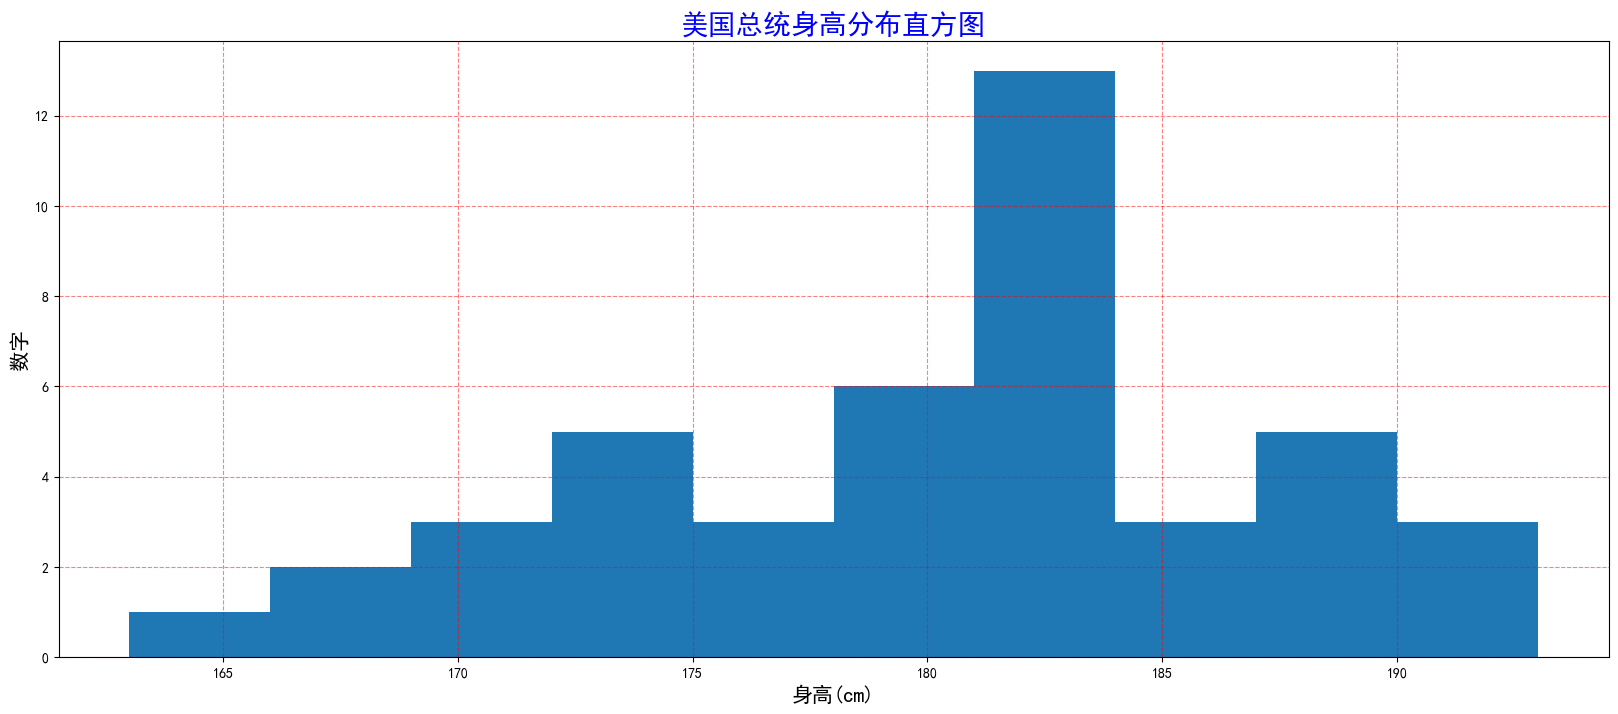

In [28]:
from pylab import mpl
mpl.rcParams["font.sans-serif"]=["SimHei"]
mpl.rcParams["axes.unicode_minus"]=False
from matplotlib import pyplot as plt
plt.figure(figsize=(20,8),dpi=100)
plt.hist(height)
plt.title('美国总统身高分布直方图',fontsize=20,color='b')
plt.xlabel('身高(cm)',fontsize=15)
plt.ylabel('数字',fontsize=15)
plt.grid(True,alpha=0.5,color='r',linestyle='--')
plt.show()

<p>这些聚合是探索数据分析的一些最基本片段，本书后续的章节将进行更
深入的介绍。</p>

<h2>2.5 数组的计算：广播</h2>

<p>我们在前一节中介绍了 NumPy 如何通过通用函数的向量化操作来减少
缓慢的 Python 循环，另外一种向量化操作的方法是利用 NumPy 的广播
功能。广播可以简单理解为用于不同大小数组的二进制通用函数（加、
减、乘等）的一组规则。
</p>

<h3>2.5.1 广播的介绍</h3>

<p>前面曾提到，对于同样大小的数组，二进制操作是对相应元素逐个计
算：
</p>

In [29]:
a = np.array([0,1,2])
b = np.array([5,5,5])
a+b

array([5, 6, 7])

<p>广播允许这些二进制操作可以用于不同大小的数组。例如，可以简单地
将一个标量（可以认为是一个零维的数组）和一个数组相加：</p>

In [30]:
a+5

array([5, 6, 7])

<p>我们可以认为这个操作是将数值 5 扩展或重复至数组 [5, 5, 5]，然后
执行加法。NumPy 广播功能的好处是，这种对值的重复实际上并没有
发生，但是这是一种很好用的理解广播的模型。
我们同样也可以将这个原理扩展到更高维度的数组。观察以下将一个一
维数组和一个二维数组相加的结果：</p>

In [31]:
M = np.ones((3,3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [32]:
M+a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

<p>这里这个一维数组就被扩展或者广播了。它沿着第二个维度扩展，扩展
到匹配 M 数组的形状。<br>
以上的这些例子理解起来都相对容易，更复杂的情况会涉及对两个数组
的同时广播，例如以下示例：</p>

In [33]:
a = np.arange(3)
b = np.arange(3)[:,np.newaxis]

In [34]:
a

array([0, 1, 2])

In [35]:
b

array([[0],
       [1],
       [2]])

In [36]:
a+b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

<p>正如此前将一个值扩展或广播以匹配另外一个数组的形状，这里将 a 和
b 都进行了扩展来匹配一个公共的形状，最终的结果是一个二维数组。
以上这些例子的几何可视化如图 2-4 所示。</p>

<img src='../imgs/数组广播.png'>
<img src='../imgs/数组广播可视化.png'>
<h4 style="text-align:center;">图2-4 NumPy广播的可视化</h4>

<p>浅色的盒子表示广播的值。同样需要注意的是，这个额外的内存并没有
在实际操作中进行分配，但是这样的想象方式更方便我们从概念上理
解。</p>

<h3>2.5.2 广播的规则</h3>

<p>NumPy 的广播遵循一组严格的规则，设定这组规则是为了决定两个数
组间的操作。</p>

<h4>01. 广播示例1</h4>

<p>将一个二维数组与一个一维数组相加：</p>

In [37]:
M = np.ones((2,3))
a = np.arange(3)

In [38]:
M

array([[1., 1., 1.],
       [1., 1., 1.]])

In [39]:
a

array([0, 1, 2])

<p>来看这两个数组的加法操作。两个数组的形状如下：</p>

In [40]:
M.shape = (2,3)
a.shape = (3,)

<p>可以看到，根据规则 1，数组 a 的维度数更小，所以在其左边补1:</p>

<p>根据规则 2，第一个维度不匹配，因此扩展这个维度以匹配数组：</p>

<p>现在两个数组的形状匹配了，可以看到它们的最终形状都为 (2,
3)：</p>

In [41]:
M+a

array([[1., 2., 3.],
       [1., 2., 3.]])

<h4>02 广播示例2</h4>

<p>来看两个数组均需要广播的示例：</p>

In [42]:
import numpy as np

In [43]:
a = np.arange(3).reshape((3,1))
b = np.arange(3)

<p>同样，首先写出两个数组的形状：</p>

In [44]:
a.shape=(3,1)
b.shape=(3,)

<p>规则 1 告诉我们，需要用 1 将 b 的形状补全：
</p>

<p>规则 2 告诉我们，需要更新这两个数组的维度来相互匹配</p>

<p>因为结果匹配，所以这两个形状是兼容的，可以看到以下结果：</p>

In [45]:
a+b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

<h4>03. 广播示例3</h4>

<p>现在来看一个两个数组不兼容的示例：</p>

In [46]:
M = np.ones((3,2))
a = np.arange(3)

<p>和第一个示例相比，这里有个微小的不同之处：矩阵 M 是转置的。
那么这将如何影响计算呢？两个数组的形状如下：
</p>

In [47]:
M.shape = (3,2)
a.shape = (3,)

<p>同样，规则 1 告诉我们，a 数组的形状必须用 1 进行补全：</p>

<p>根据规则 2，a 数组的第一个维度进行扩展以匹配 M 的维度：
</p>

<p>根据规则 2，a 数组的第一个维度进行扩展以匹配 M 的维度：</p>

<p>现在需要用到规则 3——最终的形状还是不匹配，因此这两个数组
是不兼容的。当我们执行运算时会看到以下结果：
</p>

In [48]:
try:
    M+a
except BaseException as e:
    print(e)

operands could not be broadcast together with shapes (3,2) (3,) 


<p>请注意，这里可能发生的混淆在于：你可能想通过在 a 数组的右边
补 1，而不是左边补 1，让 a 和 M 的维度变得兼容。但是这不被广
播的规则所允许。这种灵活性在有些情景中可能会有用，但是它可
能会导致结果模糊。如果你希望实现右边补全，可以通过变形数组
来实现（将会用到 np.newaxis 关键字，详情请参见 2.2 节）：</p>

In [49]:
a[:,np.newaxis].shape

(3, 1)

In [50]:
M

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [51]:
M + a[:,np.newaxis]

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

<p>另外也需要注意，这里仅用到了 + 运算符，而这些广播规则对于任
意二进制通用函数都是适用的。例如这里的 logaddexp(a, b) 函
数，比起简单的方法，该函数计算 log(exp(a) + exp(b)) 更准
确：</p>

In [52]:
np.logaddexp(M,a[:,np.newaxis])

array([[1.31326169, 1.31326169],
       [1.69314718, 1.69314718],
       [2.31326169, 2.31326169]])

<p>关于可用的通用函数的更多信息，请参见 2.3 节</p>

<h3>2.5.3 广播的实际应用</h3>

<p>广播操作是本书中很多例子的核心，我们将通过几个简单的示例来展示
广播功能的作用。</p>

<h4>01数组的归一化</h4>

<p>在前面的一节中，我们看到通用函数让 NumPy 用户免于写很慢的
Python 循环。广播进一步扩展了这个功能，一个常见的例子就是数
组数据的归一化。假设你有一个有 10 个观察值的数组，每个观察
值包含 3 个数值。按照惯例（详情请参见 5.2 节），我们将用一个
10×3 的数组存放该数据：</p>

In [53]:
X = np.random.random((10,3))

<p>我们可以计算每个特征的均值，计算方法是利用 mean 函数沿着第
一个维度聚合：</p>

In [54]:
Xmean = X.mean(0)
Xmean

array([0.42442728, 0.55197525, 0.56043888])

<p>现在通过从 X 数组的元素中减去这个均值实现归一化（该操作是一
个广播操作）：</p>

In [55]:
x_centered = X -Xmean

<p>为了进一步核对我们的处理是否正确，可以查看归一化的数组的均
值是否接近 0：</p>

In [56]:
x_centered.mean(0)

array([-3.33066907e-17,  1.11022302e-17,  5.55111512e-17])

<p>在机器精度范围内，该均值为 0。</p>

<h4>02. 画一个二维函数</h4>

<p>广播另外一个非常有用的地方在于，它能基于二维函数显示图像。
我们希望定义一个函数 z = f (x, y)，可以用广播沿着数值区间计算
该函数：</p>

In [57]:
# x和y表示0~5区间50个步长的序列
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]
z = np.sin(x)**10+np.cos(10+y*x)*np.cos(x)

<p>我们将用 Matplotlib 来画出这个二维数组（这些工具将在 4.6 节中
详细介绍）：</p>

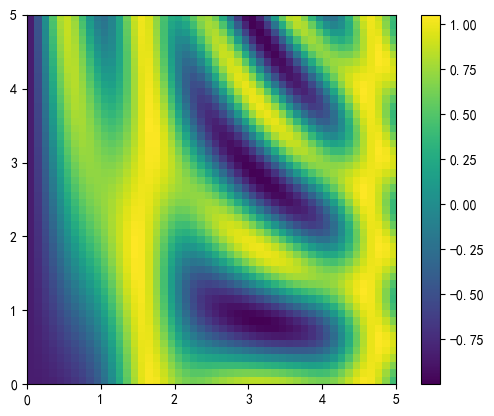

In [58]:
from matplotlib import pyplot as plt
plt.imshow(z,origin='lower',extent=[0,5,0,5],cmap='viridis')
plt.colorbar();

<h2>2.6 比较、掩码和布尔逻辑</h2>

<p>这一节将会介绍如何用布尔掩码来查看和操作 NumPy 数组中的值。当
你想基于某些准则来抽取、修改、计数或对一个数组中的值进行其他操
作时，掩码就可以派上用场了。例如你可能希望统计数组中有多少值大
于某一个给定值，或者删除所有超出某些门限值的异常点。在 NumPy
中，布尔掩码通常是完成这类任务的最高效方式。</p>

<h3>2.6.1 示例：统计下雨天数</h3>

<p>假设你有一系列表示某城市一年内日降水量的数据，这里将用
Pandas（将在第 3 章详细介绍）加载 2014 年西雅图市的日降水统计数
据：
</p>

In [59]:
import pandas as pd
# 利用Pandas抽取降雨量，放入一个NumPy数组
rainfall = pd.read_csv('../data/Seattle2014.csv')['PRCP'].values

In [60]:
inches = rainfall/254 #1/10mm
inches.shape

(365,)

<p>这个数组包含 365 个值，给出了从 2014 年 1 月 1 日至 2014 年 12 月 31
日每天的降水量。这里降水量的单位是英寸。</p>

<p>首先做一个快速的可视化，用 Matplotlib（将在第 4 章详细讨论该工
具）生成下雨天数的直方图，如图 2-6 所示：</p>

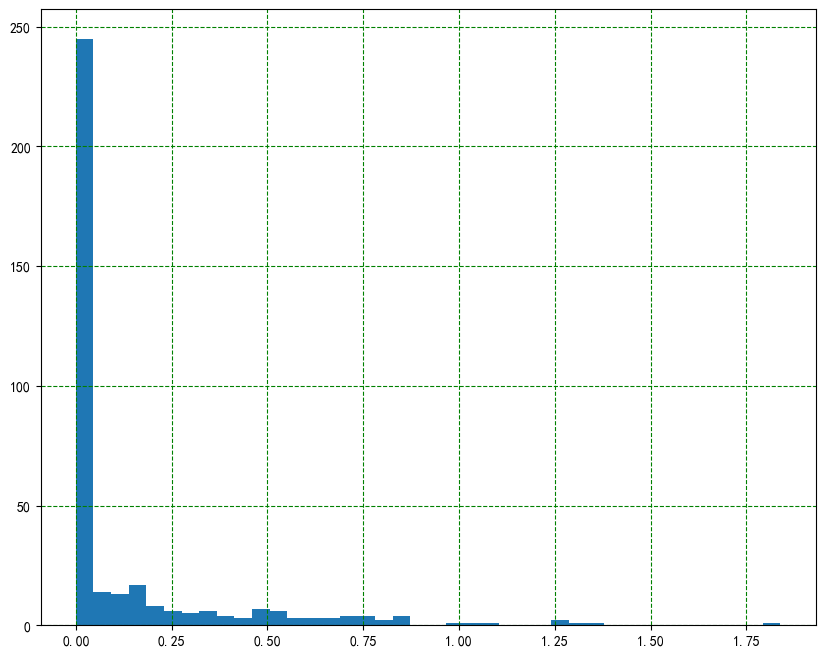

In [61]:
plt.figure(figsize=(10,8),dpi=100)
plt.grid('True',linestyle='--',color='g')
plt.hist(inches,bins=40)
plt.show()

<p>该直方图表明了这些数据的大意：尽管人们对西雅图市有刻板印象，但
是 2014 年它大多
数时间的降水量都是接近 0 的。但是这样做并没有很好地传递出我们希
望看到的某些信息，例如一年中有多少天在下雨，这些下雨天的平均降
水量是多少，有多少天的降水量超过了半英寸？</p>

<h4>深入数据</h4>

<p>回答以上问题的一种方法是通过传统的统计方式，即对所有数据循环，
当碰到数据落在我们希望的区间时计数器便加 1。这种方法在本章节中
多次讨论过，但无论从编写代码的角度看，还是从计算结果的角度看，
这都是一种浪费时间、非常低效的方法。我们从 2.3 节中了解到，
NumPy 的通用函数可以用来替代循环，以快速实现数组的逐元素
（element-wise）运算。同样，我们也可以用其他通用函数实现数组的
逐元素比较，然后利用计算结果回答之前提出的问题。先将数据放在一
边，来介绍一下 NumPy 中有哪些用掩码来快速回答这类问题的通用工
具。</p>

<h3>2.6.2 和通用函数类似的比较操作</h3>

<p>2.3 节介绍了通用函数，并且特别关注了算术运算符。我们看到用<br>
+、-、*、/ 和其他一些运算符实现了数组的逐元素操作。NumPy 还实<br>
现了如 <（小于）和 >（大于）的逐元素比较的通用函数。这些比较运<br>
算的结果是一个布尔数据类型的数组。一共有 6 种标准的比较操作：</p>

<img src='../imgs/比较操作.png'>

<p>另外，利用复合表达式实现对两个数组的逐元素比较也是可行的</p>

In [62]:
x = np.array([1,2,3,4,5])
(2*x) == (x**2)

array([False,  True, False, False, False])

<p>和算术运算符一样，比较运算操作在 NumPy 中也是借助通用函数来实
现的。例如当你写 x < 3 时，NumPy 内部会使用 np.less(x, 3)。这
些比较运算符和其对应的通用函数如下表所示。
</p>

<table>
    <tr>
        <th>运算符</th>
        <th>对应的通用函数</th>
    </tr>
    <tr>
        <td>==</td>
        <td>np.equal</td>
    </tr>
    <tr>
        <td>!=</td>
        <td>np.not_equal</td>
    </tr>
    <tr>
        <td>&lt;</td>
        <td>np.less</td>
    </tr>
    <tr>
        <td>&lt;=</td>
        <td>np.less_equal</td>
    </tr>
    <tr>
        <td>&gt;</td>
        <td>np.greater</td>
    </tr>
    <tr>
        <td>&gt;=</td>
        <td>np.greater_equal</td>
    </tr>
</table>

<p>和算术运算通用函数一样，这些比较运算通用函数也可以用于任意形
状、大小的数组。下面是一个二维数组的示例：</p>

In [63]:
rng = np.random.RandomState(0)
x = rng.randint(10,size=(3,4)) #生成从0-10的整数,组成3行四列的二维数组
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]], dtype=int32)

In [64]:
x<6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

<p>这样每次计算的结果都是布尔数组了。NumPy 提供了一些简明的模式
来操作这些布尔结果。</p>

<h3>2.6.3 操作布尔数组</h3>

<p>给定一个布尔数组，你可以实现很多有用的操作。首先打印出此前生成
的二维数组 x：</p>

In [65]:
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


<h4>01. 统计记录的个数</h4>

<p>如果需要统计布尔数组中 True 记录的个数，可以使用
np.count_nonzero 函数：</p>

In [66]:
#有多少值小于6?
np.count_nonzero(x<6)

8

<p>sum() 的好处是，和其他 NumPy 聚合函数一样，这个求和也可以
沿着行或列进行：</p>

In [67]:
# 每行有多少值小于6
np.sum(x<6,axis=1)

array([4, 2, 2])

In [68]:
# 有没有值8
np.any(x>8)

np.True_

In [69]:
#有没有值小于0
np.any(x<0)

np.False_

In [70]:
# 是否所有值都小于10？
np.all(x<10)

np.True_

In [71]:
# 是否所有值都等于6
np.all(x==6)

np.False_

In [72]:
# 是否每行的所有值都小于8
np.all(x<8,axis=1)

array([ True, False,  True])

In [73]:
np.all(x<8,axis=0)

array([ True, False,  True,  True])

<h4>02. 布尔运算符</h4>

In [74]:
np.sum((inches>0.5) & (inches < 1))

np.int64(29)

In [75]:
np.sum(~((inches <= 0.5)|(inches>=1)))

np.int64(29)

<p>将比较运算符和布尔运算符合并起来用在数组上，可以实现更多有
效的逻辑运算操作。</p>

<p>以下表格总结了逐位的布尔运算符和其对应的通用函数</p>

<img src='../imgs/布尔运算符.png'>

In [76]:
print(f'不下雨的天数{np.sum(inches == 0)}')
print(f'下雨的天数{np.sum(inches!=0)}')
print(f'降水量大于0.5英尺的天数{np.sum(inches>0.5)}')
print(f'降水量小于0.1英尺的天数{np.sum((inches>0)&(inches<0.2))}')

不下雨的天数215
下雨的天数150
降水量大于0.5英尺的天数37
降水量小于0.1英尺的天数75


<h3>2.6.4 将布尔数组作为掩码</h3>

<p>在前面的小节中，我们看到了如何直接对布尔数组进行聚合计算。一种
更强大的模式是使用布尔数组作为掩码，通过该掩码选择数据的子数据
集。以前面小节用过的 x 数组为例，假设我们希望抽取出数组中所有小
于 5 的元素：
</p>

In [77]:
import numpy as np

In [78]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]], dtype=int32)

In [79]:
x<5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

In [80]:
x[x<5]

array([0, 3, 3, 3, 2, 4], dtype=int32)

In [81]:
# 为所有下雨天都创建一个掩码
rainy = (inches>0)
# 构建一个包含整个夏季日期的掩码（6月21日是第172天）
summer = (np.arange(365)-172 < 90) & (np.arange(365) - 172 > 0)

In [82]:
print("Median precip on rainy days in 2014 (inches): ",
np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches): ",
np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches): ",
np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches):",
np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches):  0.19488188976377951
Median precip on summer days in 2014 (inches):  0.0
Maximum precip on summer days in 2014 (inches):  0.8503937007874016
Median precip on non-summer rainy days (inches): 0.20078740157480315


<p>通过将布尔操作、掩码操作和聚合结合，可以快速回答对数据集提出的
这类问题。
</p>

In [83]:
bool(3),bool(0)

(True, False)

In [84]:
bool(3 and 0)

False

In [85]:
bool(3 or 0)

True

In [86]:
bin(3) #011

'0b11'

In [87]:
bin(4) # 100

'0b100'

In [88]:
bin(3 & 4) # 011 & 100 ->同1异0->000

'0b0'

In [89]:
bin(7)

'0b111'

In [90]:
bin(4 & 7) # 100 & 111 ->同1异0故为100

'0b100'

In [91]:
bin(4|7) #同0为0，有1则1 
# 100 | 111

'0b111'

In [92]:
bin(3 | 4) #011 | 100

'0b111'

In [93]:
bin(2|3) #010| 011 ->011

'0b11'

In [94]:
A=np.array([1,0,1,0,1,0],dtype=bool)
B=np.array([1,1,1,0,1,1],dtype=bool)
A|B

array([ True,  True,  True, False,  True,  True])

In [95]:
try:
    A or B
except BaseException as e:
    print(e)

The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


In [96]:
x = np.arange(10)

In [97]:
(x>4) & (x<8)

array([False, False, False, False, False,  True,  True,  True, False,
       False])

In [98]:
try:
    (x>4) and (x<8)
except BaseException as e:
    print(e)

The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


<h2>2.7 花哨的索引</h2>

<p>在前面的小节中，我们看到了如何利用简单的索引值（如 arr[0]）、
切片（如 arr[:5]）和布尔掩码（如 arr[arr > 0]）获得并修改部分
数组。在这一节中，我们将介绍另外一种数组索引，也称作花哨的索引
（fancy indexing）。花哨的索引和前面那些简单的索引非常类似，但是
传递的是索引数组，而不是单个标量。花哨的索引让我们能够快速获得
并修改复杂的数组值的子数据集。</p>

<h3>2.7.1 探索花哨的索引</h3>

<p>花哨的索引在概念上非常简单，它意味着传递一个索引数组来一次性获
得多个数组元素。例如以下数组：</p>

In [99]:
rand = np.random.RandomState(42)
x = rand.randint(100,size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


<p>假设我们希望获得三个不同的元素，可以用以下方式实现：</p>

In [100]:
[x[3],x[7],x[2]]

[np.int32(71), np.int32(86), np.int32(14)]

<p>另外一种方法是通过传递索引的单个列表或数组来获得同样的结果：</p>

In [101]:
ind = [3,4,7]
x[ind]

array([71, 60, 86], dtype=int32)

In [103]:
ind = np.array([[3,7],[4,5]]) #ind指出利用哪些索引来组成一个2×2的二维数组
x[ind]

array([[71, 86],
       [60, 20]], dtype=int32)

<p>花哨的索引也对多个维度适用。假设我们有以下数组：</p>

In [104]:
X = np.arange(12).reshape((3,4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

<p>和标准的索引方式一样，第一个索引指的是行，第二个索引指的是列：</p>

In [105]:
row = np.array([0,1,2])
col = np.array([2,1,3])
X[row,col] #其实就是X[[0,1,2],[2,1,3]]
# 取得的就是第0行第2列2第1行第1列的数5第2行第3列的数11

array([ 2,  5, 11])

<p>这里需要注意，结果的第一个值是 X[0, 2]，第二个值是 X[1, 1]，第
三个值是 X[2, 3]。在花哨的索引中，索引值的配对遵循 2.5 节介绍过
的广播的规则。因此当我们将一个列向量和一个行向量组合在一个索引
中时，会得到一个二维的结果：
</p>

In [106]:
X[row[:,np.newaxis],col] #行数字不变列新开指定的列数为[2,1,3]列

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

<p>这里，每一行的值都与每一列的向量配对，正如我们看到的广播的算术
运算：</p>

In [107]:
row[:,np.newaxis]*col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

<p>这里特别需要记住的是，花哨的索引返回的值反映的是广播后的索引数
组的形状，而不是被索引的数组的形状。</p>

<h3>2.7.2 组合索引</h3>

<p>花哨的索引可以和其他索引方案结合起来形成更强大的索引操作：
</p>

In [108]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


<p>可以将花哨的索引和简单的索引组合使用</p>

In [109]:
X[2,[2,0,1]] #即X第2行第2列，第2行第0列,第2行第1列

array([10,  8,  9])

<p>也可以将花哨的索引和切片组合使用：</p>

In [110]:
X[1:,[2,0,1]] #即从第1行开始取到最后一行,即(1,2),(1,0),(1,1),(2,2),(2,0),(2,1)

array([[ 6,  4,  5],
       [10,  8,  9]])

<p>更可以将花哨的索引和掩码组合使用：</p>

In [111]:
mask = np.array([1,0,1,0],dtype=bool) #注意这里的数组类型为布尔型
X[row[:,np.newaxis],mask]
#行数不变列自动,遵循掩码规则,又因掩码为布尔类型所以就取到布尔值为1的列其余的不取

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

<h3>2.7.3 示例：选择随机点</h3>

<p>花哨的索引的一个常见用途是从一个矩阵中选择行的子集。例如我们有
一个 N×D 的矩阵，表示在 D 个维度的 N 个点。以下是一个二维正态分
布的点组成的数组：</p>

In [112]:
mean = [0,0]
cov = [[1,2],[2,5]]
x = rand.multivariate_normal(mean,cov,100)
x.shape

(100, 2)

In [113]:
rand.multivariate_normal?

Signature:
rand.multivariate_normal(
    mean,
    cov,
    size=None,
    check_valid='warn',
    tol=1e-08,
)
Docstring:
multivariate_normal(mean, cov, size=None, check_valid='warn', tol=1e-8)

Draw random samples from a multivariate normal distribution.

The multivariate normal, multinormal or Gaussian distribution is a
generalization of the one-dimensional normal distribution to higher
dimensions.  Such a distribution is specified by its mean and
covariance matrix.  These parameters are analogous to the mean
(average or "center") and variance (standard deviation, or "width,"
squared) of the one-dimensional normal distribution.

.. note::
    New code should use the
    `~numpy.random.Generator.multivariate_normal`
    method of a `~numpy.random.Generator` instance instead;
    please see the :ref:`random-quick-start`.

Parameters
----------
mean : 1-D array_like, of length N
    Mean of the N-dimensional distribution.
cov : 2-D array_like, of shape (N, N)
    Covariance matrix of t

<a href='https://blog.csdn.net/zch1990s/article/details/80005940' target='blank_'>不错的文章</a>

<p>利用将在第 4 章介绍的画图工具，可以用散点图将这些点可视化,见图(2-7)</p>

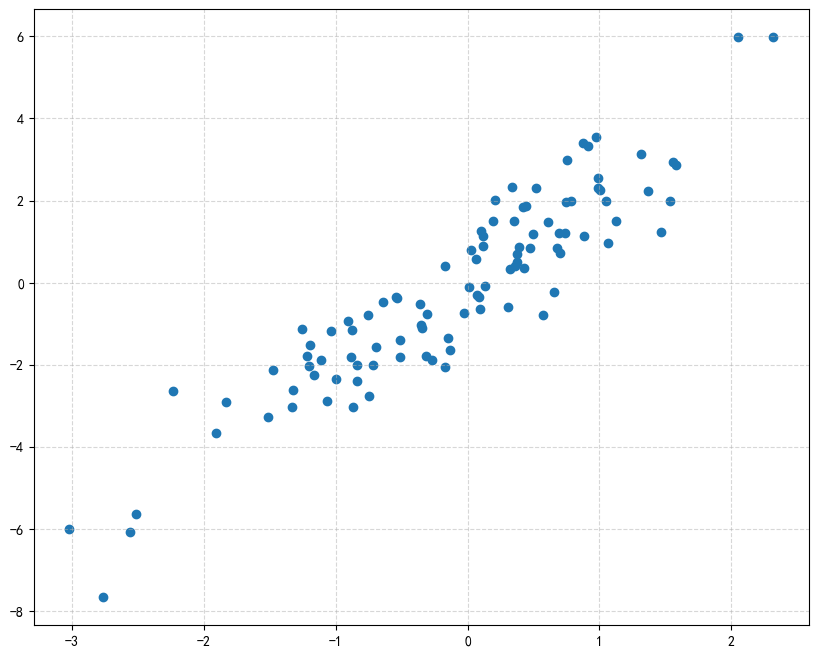

In [117]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8),dpi=100)
plt.scatter(x[:,0],x[:,1])
plt.grid(True,linestyle='--',alpha=0.5)
plt.show()

<p style='text-align:center;'>图2-7:正态分布的点</p>

<p>我们将利用花哨的索引随机选取 20 个点——选择 20 个随机的、不重复
的索引值，并利用这些索引值选取到原始数组对应的值：</p>

In [119]:
indices = np.random.choice(x.shape[0], 20, replace=False)
indices

array([67, 93, 29, 66, 88, 77, 90, 49, 47, 75, 19, 84, 58, 45,  9, 96,  7,
       38, 42, 86], dtype=int32)

<a href='https://blog.csdn.net/wzk4869/article/details/126022909?ops_request_misc=%257B%2522request%255Fid%2522%253A%25228F8448C7-694B-4A72-9786-B9FA6D66FE79%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=8F8448C7-694B-4A72-9786-B9FA6D66FE79&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~top_positive~default-1-126022909-null-null.142^v100^pc_search_result_base3&utm_term=x.shape%5B0%5D&spm=1018.2226.3001.4187' target='blank_'>解释shape[0],shape[1],shape[-1]的详细</a>

In [120]:
selection=x[indices]
selection.shape

(20, 2)

In [126]:
selection

array([[-0.51172373, -1.40960773],
       [-0.83504984, -2.38632016],
       [ 0.98783862,  2.30280401],
       [-0.14547282, -1.34125678],
       [ 1.31256297,  3.13143269],
       [ 0.30414557, -0.5828419 ],
       [ 0.01374713, -0.11539344],
       [ 0.33399913,  2.32597923],
       [-0.35490984, -1.03657119],
       [-1.03637857, -1.18469125],
       [-0.50886808, -1.81099656],
       [ 1.56094354,  2.9330816 ],
       [ 0.42044896,  1.85189522],
       [ 2.32083881,  5.97698647],
       [ 0.0843329 , -0.3543059 ],
       [-1.2567603 , -1.125898  ],
       [ 0.35282131,  1.49875397],
       [ 0.35936721,  0.40554974],
       [ 0.02815138,  0.79654924],
       [-1.32319163, -2.61218347]])

<p>现在来看哪些点被选中了，将选中的点在图上用大圆圈标示出来</p>

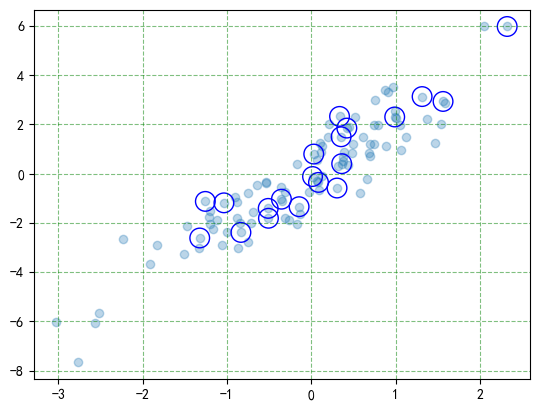

In [125]:
plt.scatter(x[:,0],x[:,1],alpha=0.3)
plt.grid(True,color='g',alpha=0.5,linestyle='--')
plt.scatter(selection[:,0],selection[:,1],facecolor='none',edgecolor='b',s=200)
plt.show()


<p style='text-align:center;'>图2-8,随机选择的点</p>

<p>这种方法通常用于快速分割数据，即需要分割训练 / 测试数据集以验证
统计模型（详情请参见 5.3 节）时，以及在解答统计问题时的抽样方法
中使用。</p>

<h3>2.7.4 用花哨的索引修改值</h3>

<p>正如花哨的索引可以被用于获取部分数组，它也可以被用于修改部分数
组。例如，假设我们有一个索引数组，并且希望设置数组中对应的值：</p>

In [128]:
x = np.arange(10)
i = np.array([2,1,8,4])
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [129]:
i

array([2, 1, 8, 4])

In [130]:
x[i]=99 #让数组x的第2个元素第1个元素第8个元素第4个元素的值都变为99
print(x) #打印输出查看结果

[ 0 99 99  3 99  5  6  7 99  9]


<p>可以用任何的赋值操作来实现，例如：</p>

In [131]:
x[i] -= 10 #让数组x的第2个元素第1个元素第8个元素第4个元素的值都减去10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


<p>不过需要注意，操作中重复的索引会导致一些出乎意料的结果产生，如
以下例子所示：</p>

In [133]:
x = np.zeros(10,dtype=int)
x

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [134]:
x[[0,0]] = [4,6]
print(x)

[6 0 0 0 0 0 0 0 0 0]


<p>4 去哪里了呢？这个操作首先赋值 x[0] = 4，然后赋值 x[0] = 6，因
此当然 x[0] 的值为 6。</p>

<p>以上还算合理，但是设想以下操作：</p>

In [135]:
i = [2,3,3,4,4,4]
x[i]+=1
x

array([6, 0, 1, 1, 1, 0, 0, 0, 0, 0])

<p>你可能期望 x[3] 的值为 2，x[4] 的值为 3，因为这是这些索引值重复
的次数。但是为什么结果不同于我们的预想呢？从概念的角度理解，这
是因为 x[i] += 1 是 x[i] = x[i] + 1 的简写。x[i] + 1 计算后，
这个结果被赋值给了 x 相应的索引值。记住这个原理后，我们却发现数
组并没有发生多次累加，而是发生了赋值，显然这不是我们希望的结
果。
</p>

<p>因此，如果你希望累加，该怎么做呢？你可以借助通用函数中的 at()
方法（在 NumPy 1.8 以后的版本中可以使用）来实现。进行如下操作：</p>

In [137]:
x = np.zeros(10)

In [138]:
x

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [140]:
np.add.at(x,i,1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


In [139]:
np.add.at? #a表示数组,i表示索引,b表示要加上的数字

Docstring:
at(a, indices, b=None, /)

Performs unbuffered in place operation on operand 'a' for elements
specified by 'indices'. For addition ufunc, this method is equivalent to
``a[indices] += b``, except that results are accumulated for elements that
are indexed more than once. For example, ``a[[0,0]] += 1`` will only
increment the first element once because of buffering, whereas
``add.at(a, [0,0], 1)`` will increment the first element twice.

.. versionadded:: 1.8.0

Parameters
----------
a : array_like
    The array to perform in place operation on.
indices : array_like or tuple
    Array like index object or slice object for indexing into first
    operand. If first operand has multiple dimensions, indices can be a
    tuple of array like index objects or slice objects.
b : array_like
    Second operand for ufuncs requiring two operands. Operand must be
    broadcastable over first operand after indexing or slicing.

Examples
--------
Set items 0 and 1 to their negative values:

>

<p>at() 函数在这里对给定的操作、给定的索引（这里是 i）以及给定的
值（这里是 1）执行的是就地操作。另一个可以实现该功能的类似方法
是通用函数中的 reduceat() 函数，你可以在 NumPy 文档中找到关于
该函数的更多信息。
</p>

<h3>2.7.5 示例：数据区间划分</h3>

<p>你可以用这些方法有效地将数据进行区间划分并手动创建直方图。例
如，假定我们有 1000 个值，希望快速统计分布在每个区间中的数据频
次，可以用 ufunc.at 来计算：</p>

In [143]:
np.random.seed(42)
x = np.random.randn(100)

# 手动计算直方图
bins = np.linspace(-5,5,20) #-5 - 5 划分为20个区间
counts = np.zeros_like(bins) #全部设置为0
# 为每个x找到合适的区间
i = np.searchsorted(bins,x)
# 为每个区间加上1
np.add.at(counts,i,1)

<p>计数数组 counts 反映的是在每个区间中的点的个数，即直方图分布
（如图 2-9 所示）：
</p>

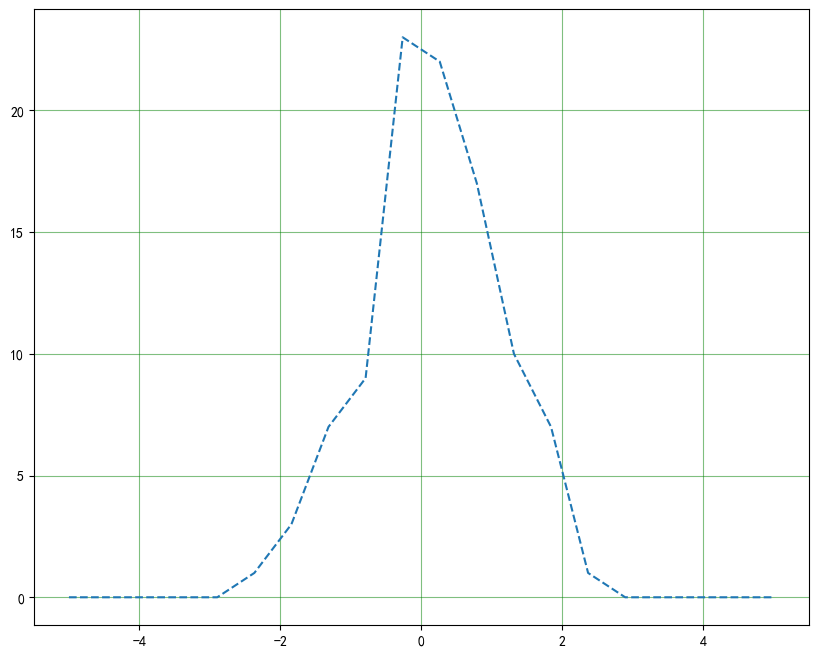

In [153]:
plt.figure(figsize=(10,8),dpi=100)
plt.plot(bins,counts,linestyle='--')
plt.grid(True,alpha=0.5,linestyle='-',color='g')
plt.show()

<p style='text-align:center'>图2-9:手动计算直方图</p>

<p>当然，如果每次需要画直方图你都这么做的话，也是很不明智的。这就
是为什么 Matplotlib 提供了 plt.hist() 方法，该方法仅用一行代码就
实现了上述功能：</p>

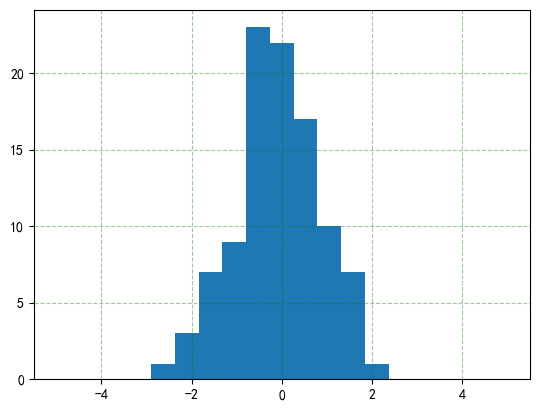

In [157]:
plt.hist(x,bins)
plt.grid(True,alpha=0.4,linestyle='--',color='g')
plt.show()

<p>这个函数将生成一个和图 2-9 几乎一模一样的图。为了计算区间，
Matplotlib 将使用 np.histogram 函数，该函数的计算功能也和上面执
行的计算类似。接下来比较一下这两种方法：</p>

In [158]:
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)
print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
26.7 µs ± 1.49 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Custom routine:
14 µs ± 222 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


<p>可以看到，我们一行代码的算法比 NumPy 优化过的算法快好几倍！这
是如何做到的呢？如果你深入 np.histogram 源代码（可以在 IPython
中输入 np.histogram?? 查看源代码），就会看到它比我们前面用过的
简单的搜索和计数方法更复杂。这是由于 NumPy 的算法更灵活（需要
适应不同场景），因此在数据点比较大时更能显示出其良好性能：</p>

<p>以上比较表明，算法效率并不是一个简单的问题。一个对大数据集非常
有效的算法并不总是小数据集的最佳选择，反之同理（详情请参见
2.8.3 节）。但是自己编写这个算法的好处是可以理解这些基本方法。
你可以利用这些编写好的模块去扩展，以实现一些有意思的自定义操
作。将 Python 有效地用于数据密集型应用中的关键是，当应用场景合
适时知道使用 np.histogram 这样的现成函数，当需要执行更多指定的
操作时也知道如何利用更低级的功能来实现。</p>

In [159]:
# 转numpy第三段